In [443]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset.csv


In [444]:
dataSpotify = pd.read_csv('/kaggle/input/dataset.csv')

In [445]:
dataSpotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [446]:
dataSpotify.shape

(114000, 21)

In [447]:
dataSpotify.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Реквизиты dataset Spotify

1. `track_id` — Идентификатор трека.
1. `artists` — Исполнители.
1. `album_name` — Название альбома.
1. `track_name` — Название трека.
1. `popularity` — Популярность.
1. `duration_ms` — Длительность (в миллисекундах).
1. `explicit` — Метка контента (наличие ненормативной лексики).
1. `danceability` — Танцевальность.
1. `energy` — Энергичность.
1. `key` — Тональность.
1. `loudness` — Громкость.
1. `mode` — Лад (мажор/минор).
1. `speechiness` — Разговорность.
1. `acousticness` — Акустичность.
1. `instrumentalness` — Инструментальность.
1. `liveness` — Живость (наличие живой аудитории).
1. `valence` — Настроение (эмоциональная окраска).
1. `tempo` — Темп (в ударах в минуту).
1. `time_signature` — Размер (число ударов в такте).
1. `track_genre` — Жанр трека.


## Импорт библиотек для построения графиков

In [448]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

## Популярность треков диаграмма

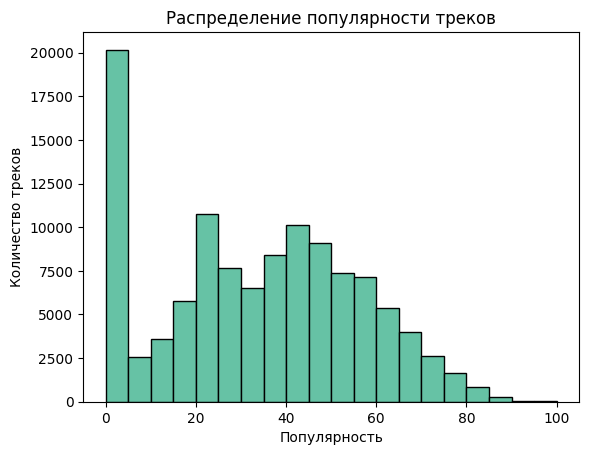

In [449]:

plt.hist(dataSpotify['popularity'], bins=20, edgecolor='black')
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.show()

вывод: датасет соответсвует реальности, где популярных треков не так много

## Распределение настроения по ладу (Виолончельная диаграмма)

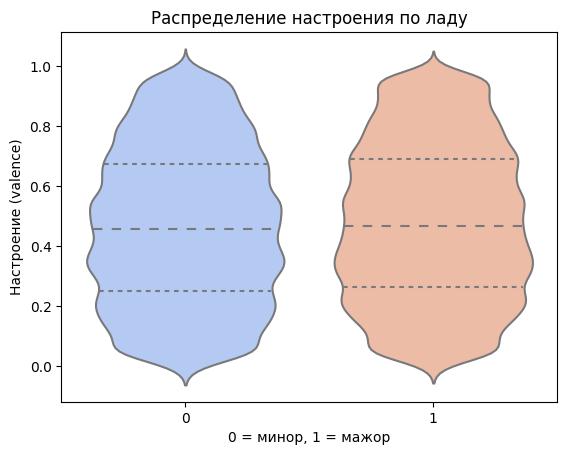

In [450]:
sns.violinplot(x='mode', y='valence', data=dataSpotify, palette='coolwarm', inner='quartile')
plt.title('Распределение настроения по ладу')
plt.xlabel('0 = минор, 1 = мажор')
plt.ylabel('Настроение (valence)')
plt.show()

Вывод: лад почти не влияет на значение настроения

## Зависимость популярности от настроения. (Коробчатая диаграмма)

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


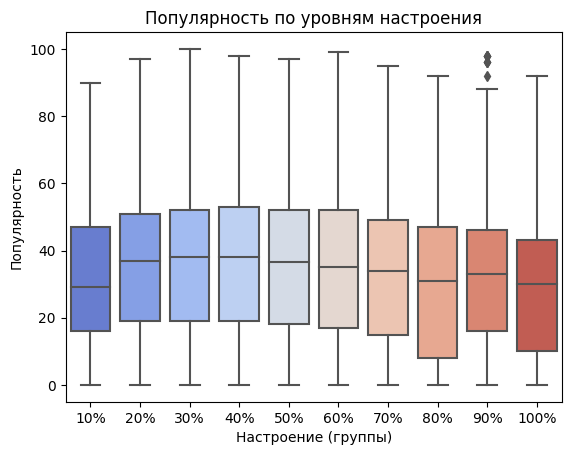

In [451]:

dataSpotify['valence_group'] = pd.cut(dataSpotify['valence'], bins=10, labels=['10%', '20%', '30%', '40%','50%', 
                                                                               '60%', '70%','80%','90%','100%'])
sns.boxplot(x='valence_group', y='popularity', data=dataSpotify, palette='coolwarm')
plt.title('Популярность по уровням настроения')
plt.xlabel('Настроение (группы)')
plt.ylabel('Популярность')
plt.show()

Вывод: настроение немного влияет на популярность, сильно эмоциональные треки с меньшей вероятностью будут популярны у аудитории

## Зависимость популярности от жанра

In [452]:
num_genres = dataSpotify['track_genre'].nunique()
print(f"Количество уникальных жанров: {num_genres}")

Количество уникальных жанров: 114


### Топ 10 самых популярных жанров

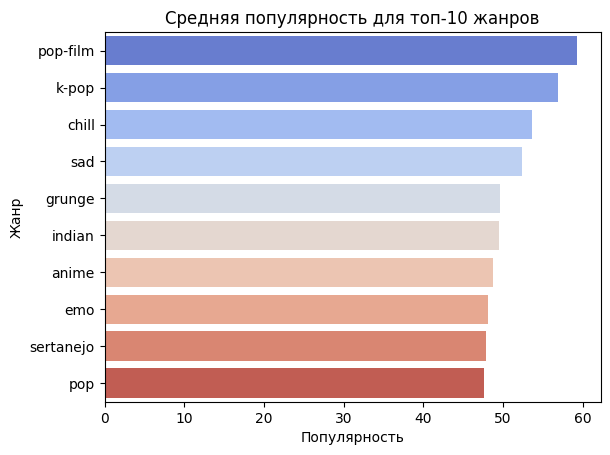

In [453]:
# Средняя популярность по жанрам
top_genres = dataSpotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10).reset_index()

sns.barplot(x='popularity', y='track_genre', data=top_genres, palette='coolwarm')
plt.title('Средняя популярность для топ-10 жанров')
plt.xlabel('Популярность')
plt.ylabel('Жанр')
plt.show()

### Топ 10 самых непопулярных жанров

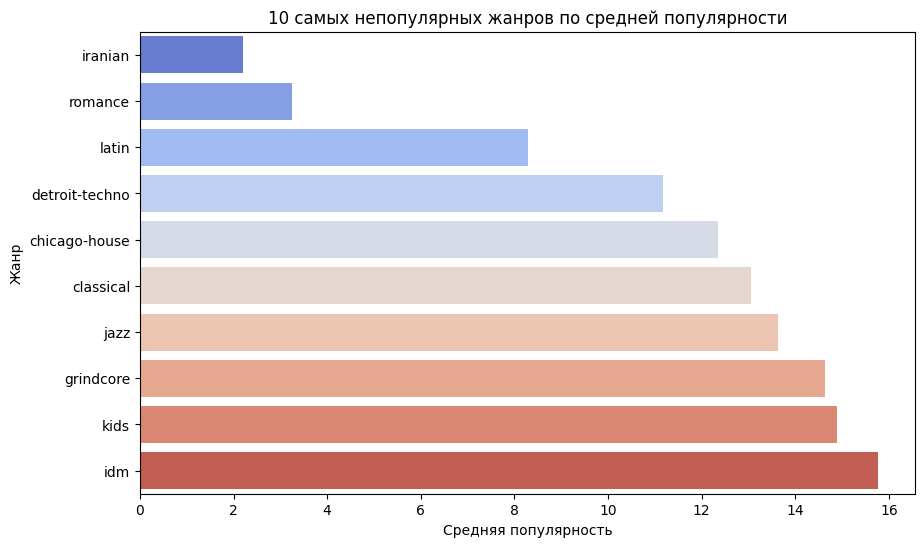

In [454]:

average_popularity = dataSpotify.groupby('track_genre')['popularity'].mean().sort_values().head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=average_popularity, palette='coolwarm')

plt.title('10 самых непопулярных жанров по средней популярности')
plt.xlabel('Средняя популярность')
plt.ylabel('Жанр')
plt.show()

Вывод: жанр очень сильно влияет на популярность. Например джаз и классическую музыку почти не слушают, в отличии от поп музыки

## Зависимость популярности трека от исполнителя. 
## И зависимость популярности исполнителя отколичества выпущенных треков

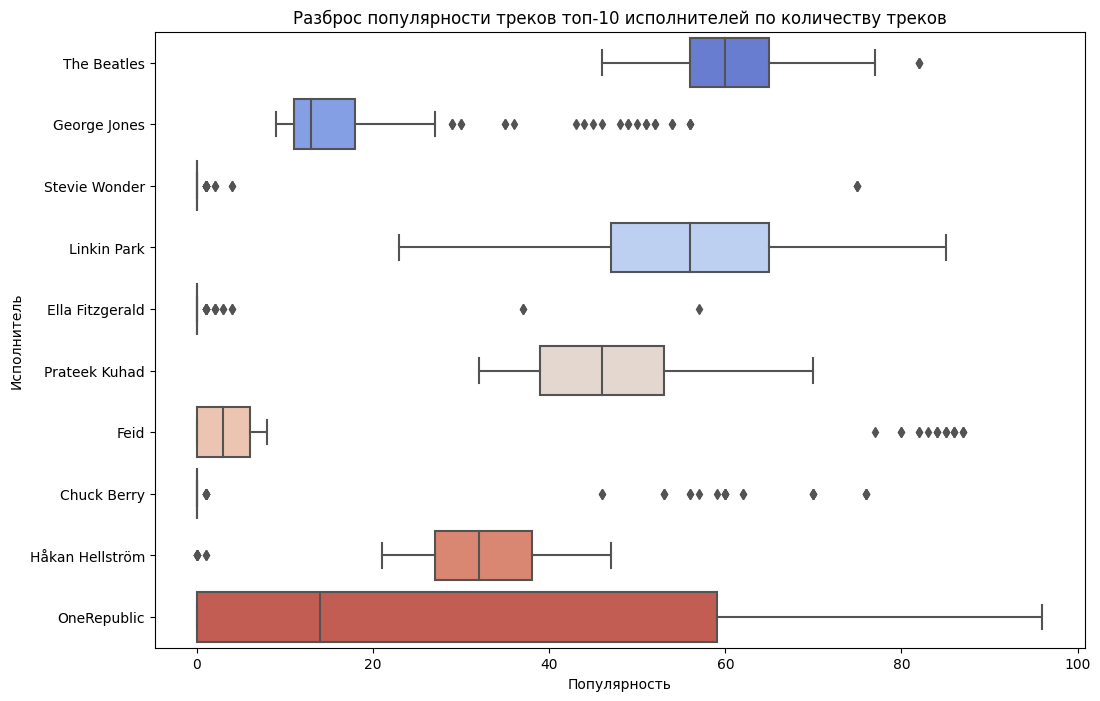

In [455]:

# Найти топ-10 исполнителей по количеству треков
top_artists = dataSpotify['artists'].value_counts().head(10).index


top_artists_data = dataSpotify[dataSpotify['artists'].isin(top_artists)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='popularity', y='artists', data=top_artists_data, order=top_artists, palette='coolwarm')

plt.title('Разброс популярности треков топ-10 исполнителей по количеству треков')
plt.xlabel('Популярность')
plt.ylabel('Исполнитель')
plt.show()

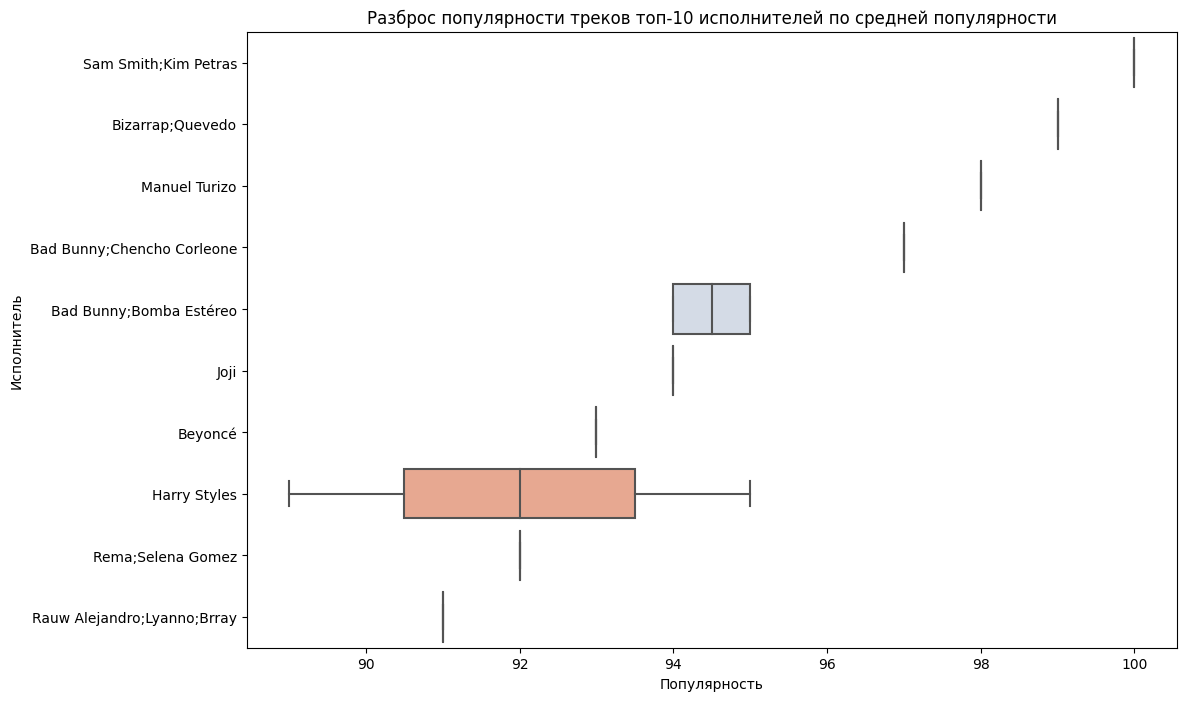

In [456]:
# Вычисление средней популярности для каждого исполнителя
average_popularity_per_artist = dataSpotify.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 8))
sns.boxplot(x='popularity', y='artists', data=dataSpotify[dataSpotify['artists'].isin(average_popularity_per_artist['artists'])], 
            order=average_popularity_per_artist['artists'], palette='coolwarm')
#plt.xlim(0, 100)
plt.title('Разброс популярности треков топ-10 исполнителей по средней популярности')
plt.xlabel('Популярность')
plt.ylabel('Исполнитель')
plt.show()


Вывод: количество выпущенных треков увеличивает вероятность того, что хотябы несколько из них станут популярными.        Если исполнитель уже популярен, то вероятность того что новый трек будет популярным почти 100%


# Работа с данными

## Удаление выбросов

In [457]:
# Удаляет треки с нулевой популярностью
dataSpotify = dataSpotify[dataSpotify['popularity'] > 0]

## Удаление пустых значений

In [458]:
# Удаляет строки, содержащие хотя бы одно значение NaN
dataSpotify = dataSpotify.dropna()

## Признак общий жанр трека 

In [459]:
unique_genres = dataSpotify['track_genre'].unique()
print(unique_genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [460]:
# Словарь с категориями жанров
genre_groups = {
    'pop': ['pop', 'power-pop', 'pop-film', 'indie', 'indie-pop', 'synth-pop','k-pop', 'j-pop'],
    'rock': ['rock', 'punk', 'punk-rock', 'hard-rock', 'alt-rock', 'grunge', 'psych-rock', 
             'garage', 'rockabilly', 'black-metal', 'heavy-metal', 'death-metal', 
             'metal', 'metalcore', 'grindcore', 'goth'],
    'edm': ['edm', 'electronic', 'techno', 'trance', 'dubstep', 'idm', 'deep-house', 
            'progressive-house', 'club', 'electro', 'minimal-techno', 
            'detroit-techno', 'chicago-house'],
    'hiphop': ['hip-hop', 'r-n-b', 'trap'],
    'classical': ['classical', 'piano', 'opera', 'instrumentalness', 'show-tunes'],
    'jazz_blues_soul': ['jazz', 'blues', 'soul', 'singer-songwriter', 'songwriter', 'acoustic', 'gospel'],
    'folk_country': ['folk', 'country', 'honky-tonk', 'bluegrass', 'guitar'],
    'kids': ['children', 'kids', 'disney', 'comedy'],
    'relax': ['ambient', 'chill', 'study', 'sleep', 'happy', 'new-age'],
    'world_music': ['world-music', 'afrobeat', 'british', 'j-rock', 'j-dance', 'j-idol', 
                    'turkish', 'spanish', 'brazil', 'samba', 'pagode', 'forro', 
                    'iranian', 'french', 'malay', 'mandopop', 'cantopop', 
                    'latin', 'latino', 'sertanejo', 'mpb'],
    'hardcore': ['hardcore', 'hardstyle', 'groove', 'grindcore'],
    'other': ['party', 'dub', 'dance', 'dancehall', 'breakbeat', 'drum-and-bass', 
              'reggae', 'reggaeton', 'ska', 'tango', 'romance', 'sad', 
              'detroit-techno', 'british', 'garage', 'french', 'german', 'swedish', 
              'iranian', 'turkish']
}

# Функция для группировки жанров
def group_genre(genre):
    for category, genres in genre_groups.items():
        if genre in genres:
            return category
    return 'other'

# Применяем функцию ко всей колонке track_genre
dataSpotify['genre_group'] = dataSpotify['track_genre'].apply(group_genre)

In [461]:
# Смотрим первые 5 строк результата
print(dataSpotify[['track_genre', 'genre_group']].head())

  track_genre      genre_group
0    acoustic  jazz_blues_soul
1    acoustic  jazz_blues_soul
2    acoustic  jazz_blues_soul
3    acoustic  jazz_blues_soul
4    acoustic  jazz_blues_soul


## Преобразование данных в числовые значения и удаление информации не нужной для анализа

In [462]:
dataSpotify.dtypes

Unnamed: 0             int64
track_id              object
artists               object
album_name            object
track_name            object
popularity             int64
duration_ms            int64
explicit                bool
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature         int64
track_genre           object
valence_group       category
genre_group           object
dtype: object

In [463]:
from sklearn.preprocessing import LabelEncoder

# Преобразование категориальных колонок
for col in ['artists', 'album_name', 'track_name','track_genre', 'genre_group', 'explicit', 'valence_group']:
    le = LabelEncoder()
    dataSpotify[col] = le.fit_transform(dataSpotify[col])

In [464]:
# Удаление колонки track_id
dataSpotify.drop(columns=['track_id'], inplace=True)
# Удаление колонки Unnamed
dataSpotify.drop(columns=['Unnamed: 0'], inplace=True)

In [465]:
# Удаление треков с нулевой длительностью 
dataSpotify = dataSpotify.loc[dataSpotify['duration_ms'] != 0]

In [466]:
dataSpotify.dtypes

artists               int64
album_name            int64
track_name            int64
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre           int64
valence_group         int64
genre_group           int64
dtype: object

# Корреляция признаков

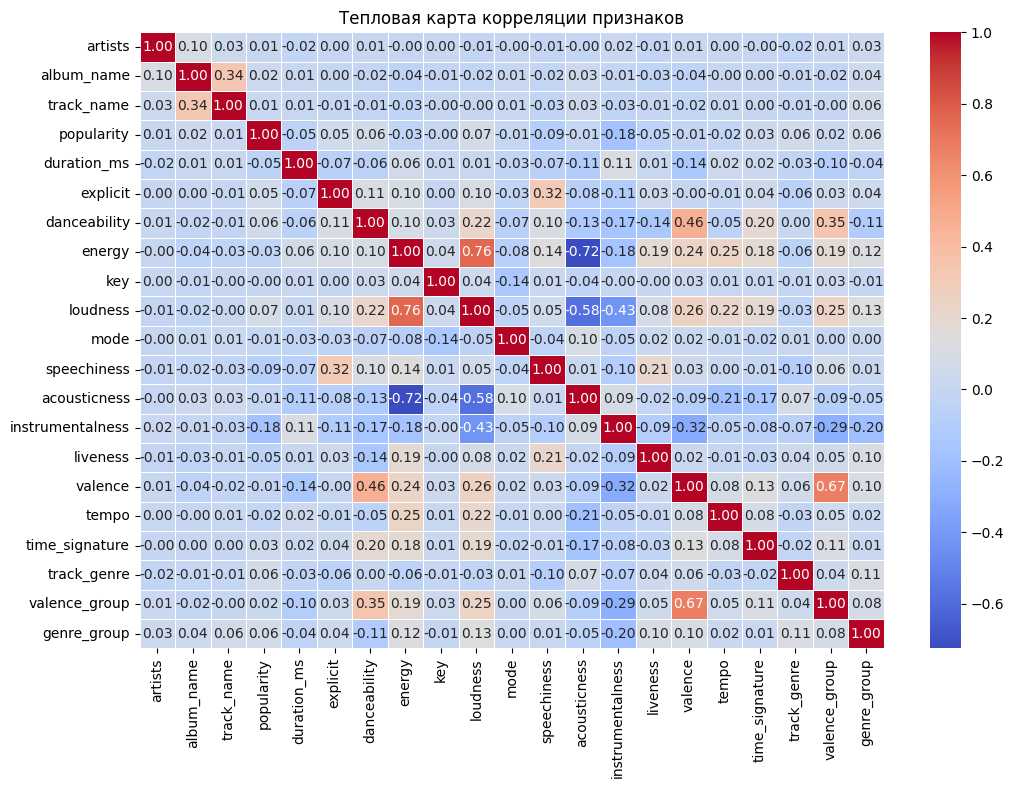

In [467]:
numeric_features = dataSpotify.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)

plt.title('Тепловая карта корреляции признаков')
plt.show()

    большая корреляция
    громкость (loudness) - энергия (energy)
    настроение - танцевальность
    обратная корреляция
    энергия (energy) - акустичность (acousticness)
    громкость - акустичность (acousticness)
    громкость - инструментальность

Вывод: Нет достаточно большой корреляции для того чтобы принять решение об удалении одного из признаков

## Проверка выбросов

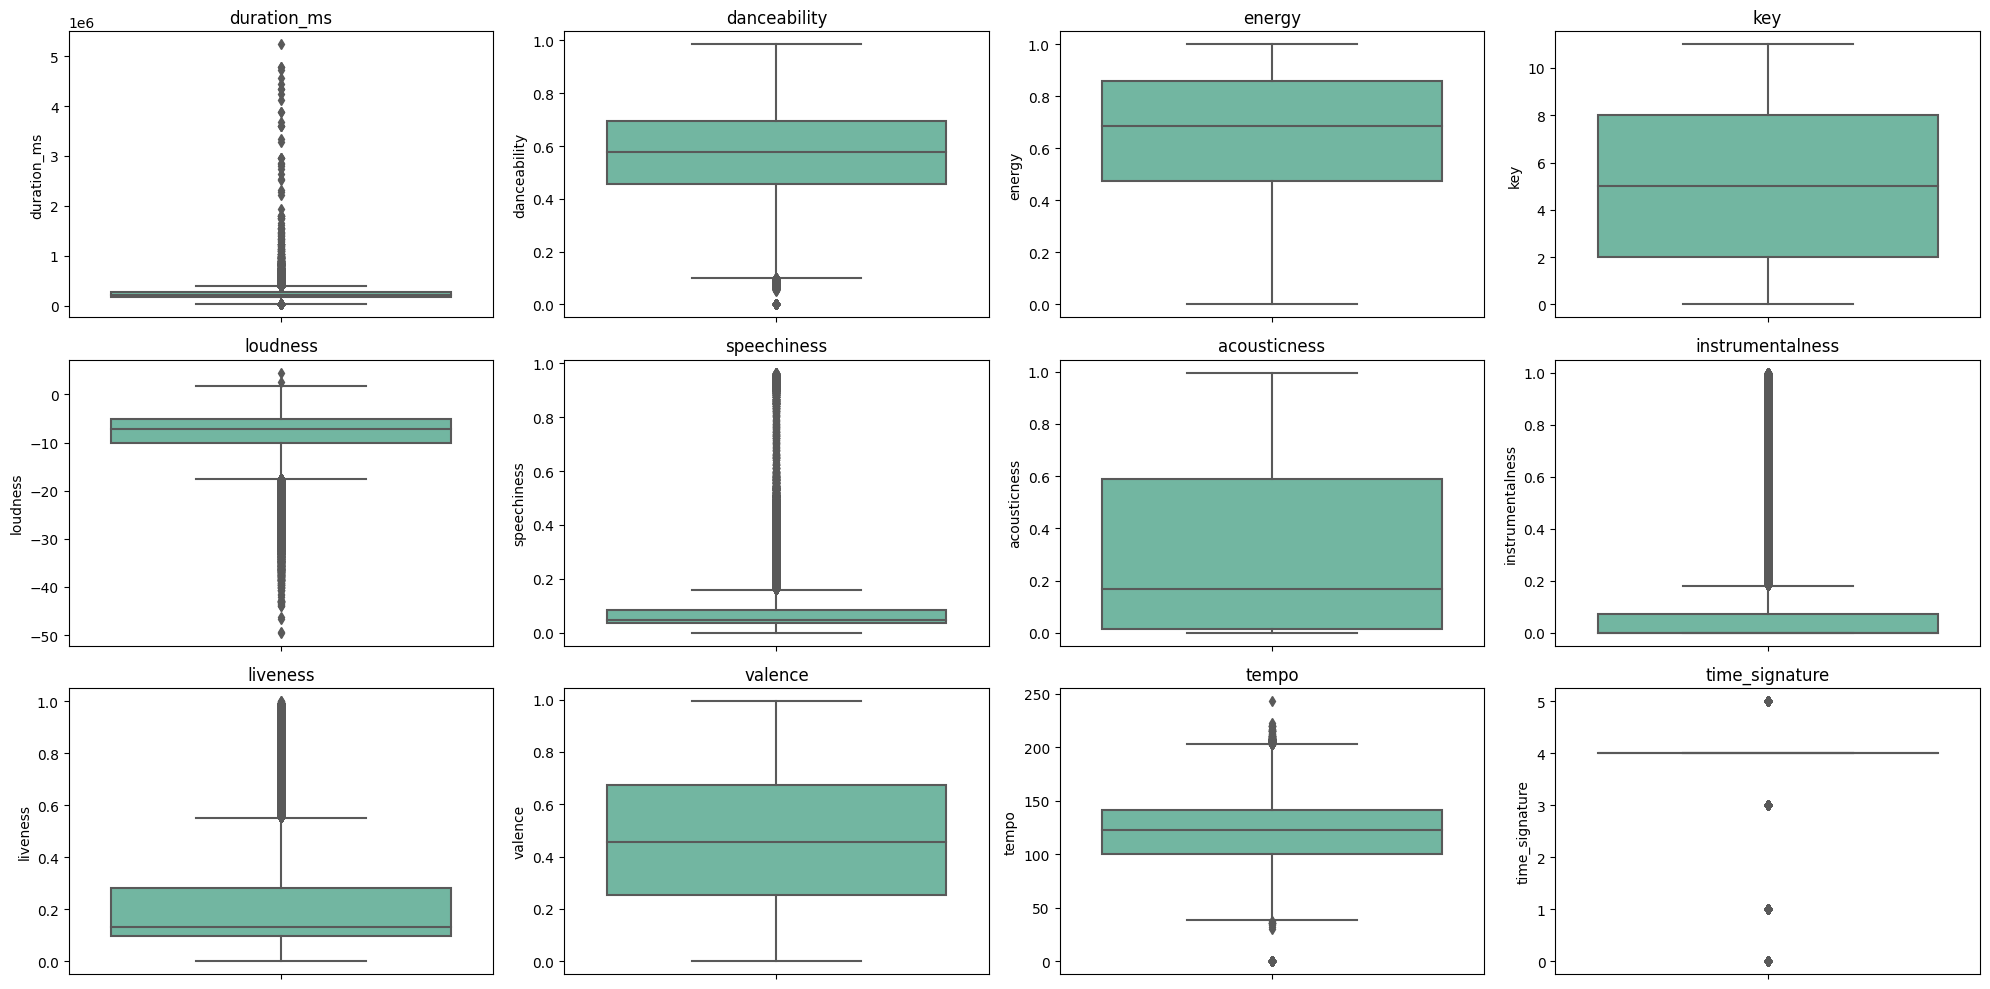

In [468]:
numeric_columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=dataSpotify[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

учитывая наличие корреляции и количество параметров, думаю нет смысла удалять все выбросы

# Модели обучения

## Разделение данных на тренировочные и тестовые 

In [469]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = dataSpotify.drop(columns=['popularity'])
y = dataSpotify['popularity']  

# Разделяем данные на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [470]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
#для нейронной сети
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
#для оценки
from sklearn.metrics import mean_absolute_error


## Линейная регрессия

### обучение модели

In [471]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### оценка модели

In [472]:
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f'MAE (Linear Regression): {mae_linear}')

MAE (Linear Regression): 15.22752352060547


## Случайный лес

### обучение модели

In [473]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### оценка модели

In [474]:
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'MAE (Random Forest): {mae_rf}')

MAE (Random Forest): 9.153255918360404


## Градиентный бустинг

### обучение модели

In [475]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### оценка модели

In [476]:
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'MAE (XGBoost): {mae_xgb}')

MAE (XGBoost): 9.824104832105489


## Нейронная сеть (Keras)

### создание модели

In [477]:
nn_model = Sequential([
    Input(shape=(20,)),              
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
nn_model.compile(optimizer=Adam(), loss='mean_absolute_error')

### обучение модели

In [478]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

### оценка модели

In [479]:
y_pred_nn = nn_model.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'MAE (Neural Network): {mae_nn}')

613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE (Neural Network): 16.01197536878864


## Выводы: сравнив модели обучения, лучший результат показал случайный лес